<a href="https://colab.research.google.com/github/JIBarrionuevoGaltier/DiploDatos2021_Grupo_4/blob/main/Trabajo_Pr%C3%A1ctico_Parte_1_DiploDatos_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRABAJO PRÁCTICO ENTREGABLE - PARTE I

### INTEGRANTES DEL GRUPO IV:
*   María Belén Acotto
*   Elías Ferreyra
*   Juan Ignacio Barrionuevo Galtier
*   Oscar Alejandro Oviedo
*   Gonzalo Heredia Edelstein

### CONSIGNAS
**RESPONDER**:¿Cuáles son los lenguajes de programación asociados a los mejores salarios?


**RESUMEN**: Para responder, se realiza una adecuación de los datos crudos, se analizan y procesan. 
Se trabaja principalmente con las variables "salary_monthly" y se correlacionan con los lenguajes de programación.

## Carga de Datos

In [ ]:
#Importo librerias
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

seaborn.set_context('talk')

In [ ]:
# El siguiente código setea la variable de pandas para poder ver todas las columnas
pd.set_option('display.max_columns', None)

# link URL
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
# generación del DataFrame (df) de trabajo
df = pd.read_csv(url)

## Pre-Análisis

In [ ]:
print('Información sobre las columnas del DATASET\n')

df.info()

Información sobre las columnas del DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   profile_gender                                6095 non-null   object 
 1   profile_age                                   6095 non-null   int64  
 2   work_country                                  6095 non-null   object 
 3   work_province                                 6095 non-null   object 
 4   profile_years_experience                      6095 non-null   float64
 5   work_years_in_company                         6095 non-null   float64
 6   work_years_in_current_position                6095 non-null   float64
 7   work_people_in_charge_of                      6095 non-null   int64  
 8   profile_studies_level                         6095 non-null   object 
 9   profile_studies_lev

Como podemos observar, tenemos **48 columnas**, con tres tipos de datos:
* float
* int
* object

### Primera vista de los datos

In [ ]:
df.head()

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,Licenciatura en Sistemas,UNNE Universidad Nacional del Nordeste,"Sí, de forma particular, Sí, los pagó un emple...",Sí,Sí,SysAdmin / DevOps / SRE,"Docker, Linux, OpenStack, VMWare, Windows Server","Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","jQuery, WordPress","Microsoft SQL Server, MySQL",PHPUnit,"Eclipse, Visual Studio Code",GNU/Linux,Android,"Sí, pasiva",0.0,Bruto,Full-Time,130000.0,102000.0,NaN,3,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,Licenciatura en Ciencias dela Computación,UBA - Universidad de Buenos Aires,No,No,Sí,Developer,Amazon Web Services,"CSS, HTML, Javascript, SQL, TypeScript","Angular, Node.js","Amazon DynamoDB, MongoDB, MySQL",Jest,Vim,macOS,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,140000.0,106000.0,NaN,1,1,Menos de un sueldo,Performance individual,No,0.0,0,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


### Mapa de Calor para análisis lijero sobre correlatividad entre columnas

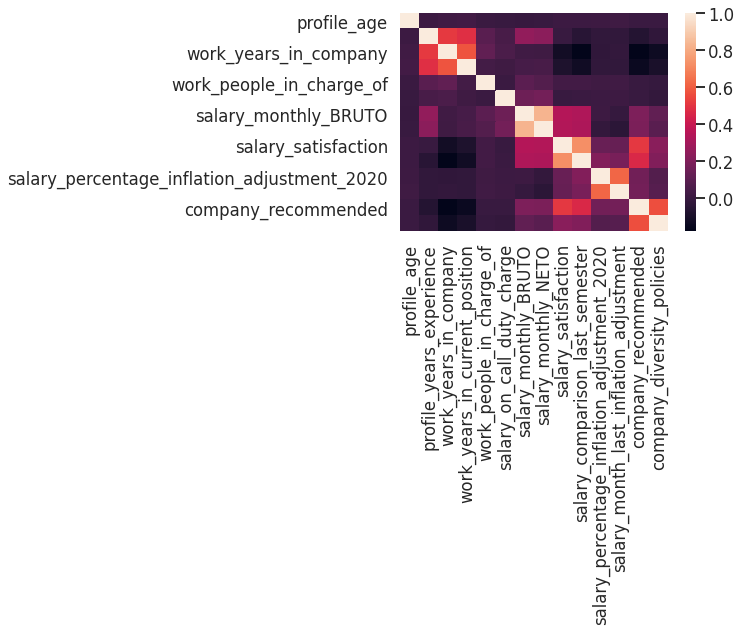

In [ ]:
#Agrego mapa de calor
seaborn.heatmap(df.corr());

#### Observaciones

> * La diagonal principal está en colores más claros (mejor correlatividad) ya que es 1, lo cual nos centramos en las columnas con colores más claros, excluyendo la matriz identidad.

### Análisis de correlatividad sobre la variable de salary_monthly_BRUTO.

In [ ]:
corr = df.corr()
corr[['salary_monthly_BRUTO']].sort_values(by = 'salary_monthly_BRUTO',ascending = False)\
.style.background_gradient()

,salary_monthly_BRUTO
salary_monthly_BRUTO,1.000000
salary_monthly_NETO,0.833335
salary_satisfaction,0.344676
salary_comparison_last_semester,0.331435
profile_years_experience,0.250545
company_recommended,0.196381
salary_on_call_duty_charge,0.149794
company_diversity_policies,0.115718
work_people_in_charge_of,0.101176
work_years_in_current_position,0.039366


#### Observaciones

> * Al ver los datos del dataset, las correlatividades de forma rápida, llegamos a tomar las siguientes columnas como columnas relevantes

In [ ]:
# Columnas del DF relevantes para el analisis
relevant_columns = ['work_contract_type','work_role','tools_programming_languages','salary_monthly_BRUTO', 'salary_monthly_NETO',
                    'profile_years_experience','work_years_in_company','work_years_in_current_position','work_people_in_charge_of']

### Valores Nulos

In [ ]:
# Cuantificación de datos vacios/NAN de columnas relevantes
print(len(df))
for s in relevant_columns:
  print(s,len(df[pd.isnull(df[s])]))

6095
work_contract_type 0
work_role 0
tools_programming_languages 1
salary_monthly_BRUTO 0
salary_monthly_NETO 212
profile_years_experience 0
work_years_in_company 0
work_years_in_current_position 0
work_people_in_charge_of 0


#### Observaciones

> * Dado los datos faltantes en la columna "salary_monthly_NETO", se trabajará con la variable "salary_monthly_BRUTO".

> * Se eliminará la fila faltante en "tools_programming_languages" y además, los que colocaron la opción "Ninguno" y otros datos que ensucian el dataset. Con esto solo se considera, aquellos que conocen algún programa.

## Primera Limpieza de Datos

In [ ]:
# Eliminación de la fila con el valor nulo
df = df[df['tools_programming_languages'].notnull()]

Rápidamente, vemos datos o lenguajes a considerar para ser eliminados.

In [ ]:
lenguajes = pd.DataFrame()
lenguajes['name'] = df.tools_programming_languages.str.split(',', expand=True).stack().to_list()
lenguajes['name'] = lenguajes['name'].str.strip()
lenguajes = lenguajes.drop_duplicates(subset=['name'])
lenguajes.sort_values(by='name')

,name
4616,-
14168,.
47,.NET
16315,.NET no es un lenguaje!
628,4gl
...,...
9982,visual basic
7713,visual fox pro
15380,xml
4098,xsl y xml.


Sacamos aquellos fáciles de identificar luego de varias pruebas

In [ ]:
df = df[~df.tools_programming_languages.str.lower().str.contains("ningun")==True]
df = df[~df.tools_programming_languages.str.lower().str.contains("aplica")==True]
df = df[~df.tools_programming_languages.str.lower().str.contains("no es")==True]
df = df[df.tools_programming_languages != '.']
df = df[df.tools_programming_languages != '-']

## Procesos sobre la variable "salary_monthly_BRUTO"

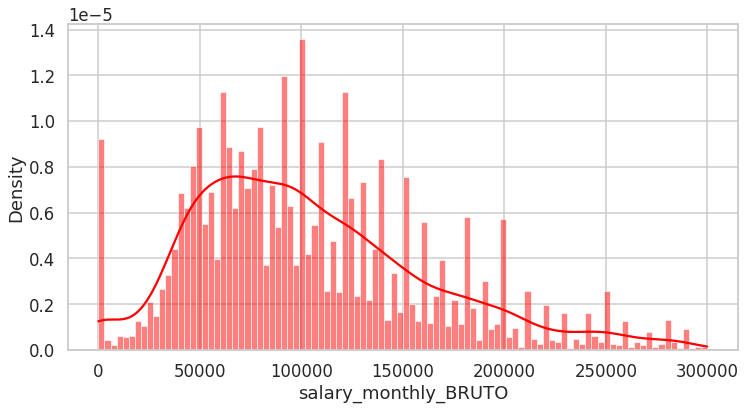

In [ ]:
max_SMB = 300000
sub_df = df[df["salary_monthly_BRUTO"] < max_SMB]
fig, ax = plt.subplots(figsize=(12,6))
seaborn.histplot(data=sub_df, x="salary_monthly_BRUTO", kde=True, bins=100, color='red', stat= 'density')

### Análisis

#### Observaciones

> * La dendidad muestra una función asimétrica, desplazada hacia valores más positivos. Es muy extendida, con valores de salario bruto muy altos. Por lo cual se filtrarán estos datos, utilizando el criterio del tercer cuartil (2.5 valores por encima). 


> * La densidad muestra un no esperable máximo local a bajo valores de salario (cercano a 0). Se filtrarán aquellos salarios menores a 1000 $AR.
Valor elegido aleatoriamente

### Filtrado de Datasets

#### Creación de funciones filtros

In [ ]:
# filtro valores
def clean_outliers_q3(dataset, column_name):
  # Returns dataset removing the outlier rows form columns @column_name
  interesting_col = dataset[column_name]
  # Here we can remove the outliers from both ends, or even add more restrictions.
  mask_outlier = (interesting_col <= (2.5 * interesting_col.quantile(.75)))
  return dataset[mask_outlier]

def clean_cero(dataset, column_name, val):
  interesting_col = dataset[column_name]
  mask_outlier = (interesting_col >= val)
  return dataset[mask_outlier]

#### Filtrar valores mínimos (ceros) y filtro con criterio del tercer cuartil

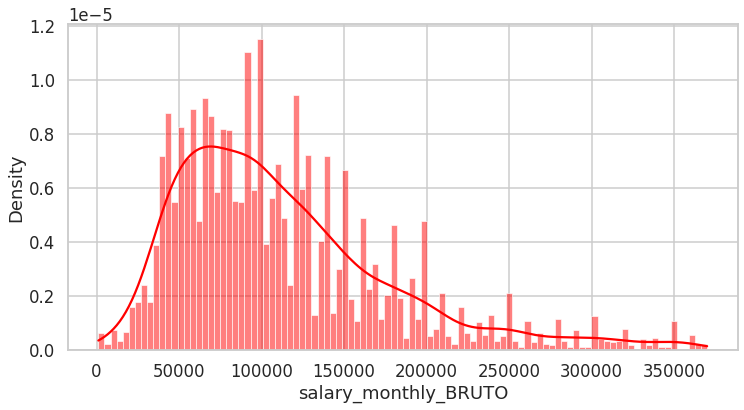

In [ ]:
salary_col = "salary_monthly_BRUTO"
valor = 1000.0
fig = plt.figure(figsize=(12, 6))
df_filtered = clean_outliers_q3(df, salary_col)
df_filtered2 = clean_cero(df_filtered, salary_col, valor)
seaborn.histplot(data=df_filtered2, x="salary_monthly_BRUTO", kde=True, bins=100, color='red', stat= 'density')
#seaborn.distplot(df_filtered2["salary_monthly_BRUTO"], hist=True, kde=True, bins=100, color='red')

### Comparativa con una distribución Normal (Gausiana)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


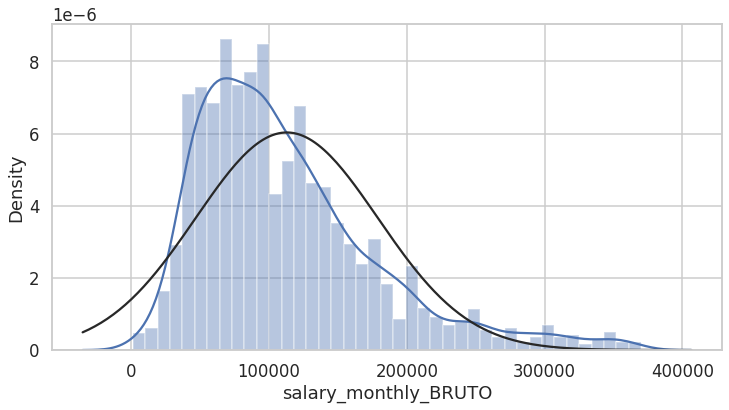

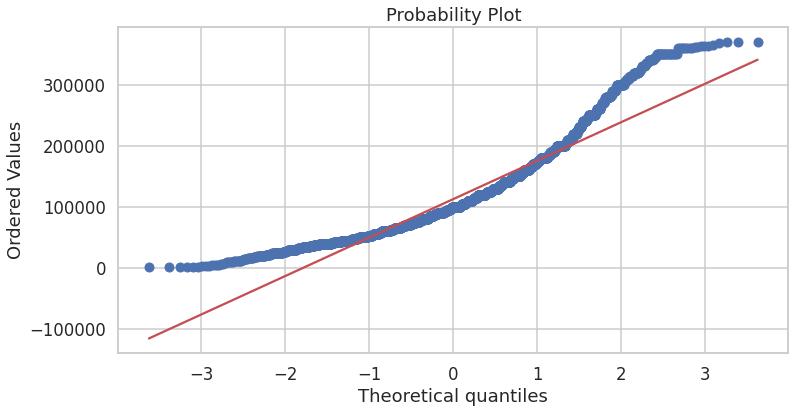

In [ ]:
# comparación con una distribución normal (gausiana)
fig = plt.figure(figsize=(12, 6))
seaborn.distplot(df_filtered2['salary_monthly_BRUTO'], fit = norm);
fig = plt.figure(figsize=(12, 6))
res = stats.probplot(df_filtered2['salary_monthly_BRUTO'], plot = plt)

### Simulación de una distribucion normal:

Como no logramos una perfecta distribución normal, lo que optamos por hacer, fue calcular el logaritmo de nuestra variable "salary_monthly_BRUTO" y dibujar la normal de esta manera

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


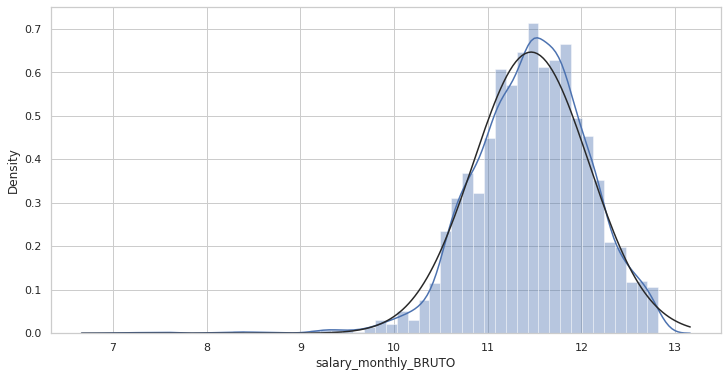

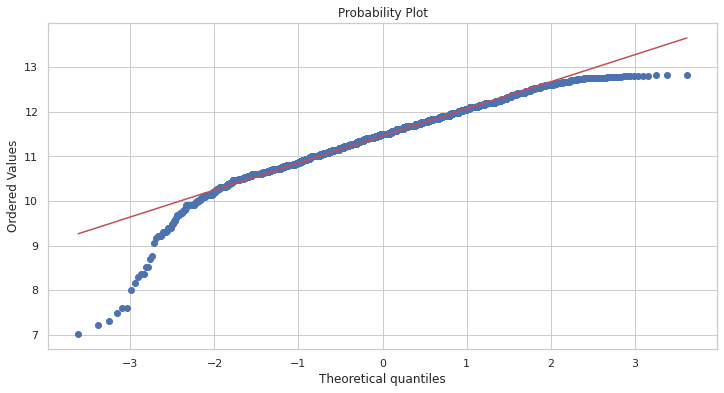

In [ ]:
# Transformación de los datos para que parezca una distribucion normal:
df_filtered3 = np.log(df_filtered2['salary_monthly_BRUTO'])
fig = plt.figure(figsize=(12, 6))
seaborn.distplot(df_filtered3, fit = norm);
fig = plt.figure(figsize=(12, 6))
res = stats.probplot(df_filtered3, plot = plt)

#### Observaciones

> * Los datos filtrados y renormalizados presentan una distribución normal. Sin embargo fuertes desviaciones todavía son observadas para valores pequeños de los salarios.

## Procesos sobre la variable "tools_programming_languages"

Descripciones sobre nuestra variable

In [ ]:
print(df_filtered2.salary_monthly_BRUTO.describe())
print(df_filtered2.salary_monthly_BRUTO.median())
print(df_filtered2.salary_monthly_BRUTO.mode())

count      4763.000000
mean     112802.170021
std       66156.689257
min        1100.000000
25%       65000.000000
50%      100000.000000
75%      141941.000000
max      370000.000000
Name: salary_monthly_BRUTO, dtype: float64
100000.0
0    100000.0
dtype: float64


Nos concentramos sobre los valores que se encuentran dentro del cuarto cuartil, es decir, "los que ganan más"

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


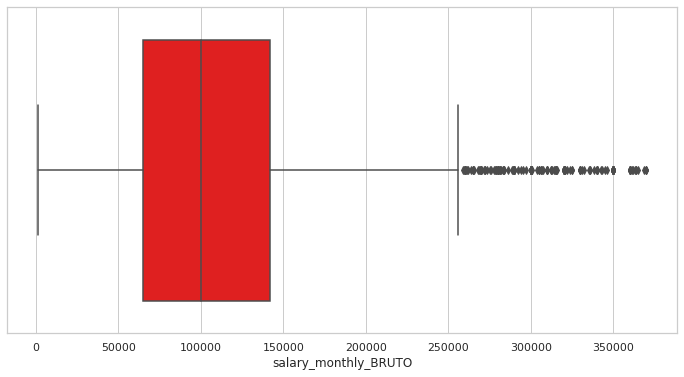

In [ ]:
auxdf = df_filtered2["salary_monthly_BRUTO"]
fig = plt.figure(figsize=(12, 6))
seaborn.boxplot(auxdf, color='red')

Función que nos ayuda a separar los distintos lenguajes de programación

In [ ]:
# Función que recorrerá una culumna, y nos separará los lenguajes agrupados
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  
  # Split string dentro de la lista de items y borramos las comas y espacios.
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]


Creamos una nueva columna dentro del dataset tratado con el lenguaje de programación

In [ ]:
# Create a new column with the list of languages
df_filtered2.loc[:, 'cured_programming_languages'] = df_filtered2.tools_programming_languages.apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# En esta sección, multiplicaremos cada fila por la cantidad de lenguajes que tiene cada usuario
# Para no duplicar información necesaria, crearemos una nueva columna para separar cada lenguaje
df_lang = df_filtered2.cured_programming_languages.apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame().join(df_filtered2[relevant_columns])\
    .rename(columns={0: 'programming_language'})

df_lang = df_lang.iloc[:, :-1] # Valores Sin la columna 'cured_programming_languages'
df_lang[:5]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,programming_language,work_contract_type,work_role,tools_programming_languages,salary_monthly_BRUTO,salary_monthly_NETO,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of
1,HTML,Full-Time,Developer,"HTML, Javascript, Python",79000.0,63000.0,5.0,2.0,2.0,4
1,Javascript,Full-Time,Developer,"HTML, Javascript, Python",79000.0,63000.0,5.0,2.0,2.0,4
1,Python,Full-Time,Developer,"HTML, Javascript, Python",79000.0,63000.0,5.0,2.0,2.0,4
3,Bash/Shell,Full-Time,SysAdmin / DevOps / SRE,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",130000.0,102000.0,15.0,15.0,13.0,5
3,C,Full-Time,SysAdmin / DevOps / SRE,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",130000.0,102000.0,15.0,15.0,13.0,5


Contabilizamos la cantidad de veces que aparecen cada lenguaje

In [ ]:
# contador de lenguajes
language_count = df_lang.programming_language.value_counts()\
    .reset_index().rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:11]

,language,frequency
0,Javascript,2340
1,SQL,2032
2,HTML,1739
3,Python,1380
4,Java,1375
5,CSS,1169
6,Bash/Shell,930
7,PHP,836
8,.NET,774
9,TypeScript,716


#### Obeservaciones

> * Se analizarán la correlación con los 11 lenguajes más utilizados en 2020 y que tengan mayor frecuencia encontradas en las respuestas.

> * Se adicionarán otros filtros, para aquellas personas **full-time** y que sean **Desarrolladores**


### Procesos sobre lenguajes más usados

Preparación de Filtros

In [ ]:
# Filtrado de lenguajes relevantes
interesting_languages = language_count.iloc[:10,0].values.tolist()
# Filtrado de personas Full-Time
interesting_people = ["Full-Time"]
# Filtrado para aquellos que se denominaron como Desarrolladores
isDeveloper = ["Developer"]

Proceso de filtrado

In [ ]:
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang = filtered_df_lang[filtered_df_lang.work_contract_type.isin(interesting_people)]
filtered_df_lang = filtered_df_lang[filtered_df_lang.work_role.isin(isDeveloper)]
filtered_df_lang[:5]

,programming_language,work_contract_type,work_role,tools_programming_languages,salary_monthly_BRUTO,salary_monthly_NETO,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of
1,HTML,Full-Time,Developer,"HTML, Javascript, Python",79000.0,63000.0,5.0,2.0,2.0,4
1,Javascript,Full-Time,Developer,"HTML, Javascript, Python",79000.0,63000.0,5.0,2.0,2.0,4
1,Python,Full-Time,Developer,"HTML, Javascript, Python",79000.0,63000.0,5.0,2.0,2.0,4
4,CSS,Full-Time,Developer,"CSS, HTML, Javascript, SQL, TypeScript",140000.0,106000.0,9.0,6.0,6.0,0
4,HTML,Full-Time,Developer,"CSS, HTML, Javascript, SQL, TypeScript",140000.0,106000.0,9.0,6.0,6.0,0


#### Observaciones

> * Como hemos filtrado nuestro conjunto de datos, volveremos a hacer un conteo de la frecuencia de los mismos
> * Notarán, que al bajar la cantidad de filas (población), baja la frecuencia de cada valor.

In [ ]:
# contador de lenguajes luego de los filtros
language_count = filtered_df_lang.programming_language.value_counts()\
    .reset_index().rename(columns={'index': 'programming_language', 'programming_language': 'frequency'})
language_count

,programming_language,frequency
0,Javascript,1228
1,HTML,862
2,SQL,797
3,CSS,657
4,Java,647
5,TypeScript,440
6,.NET,374
7,PHP,307
8,Python,289
9,Bash/Shell,154


> * A su vez, lo hemos explayado en un gráfico de barras ordenado por el lenguaje más usado en nuestra muestra

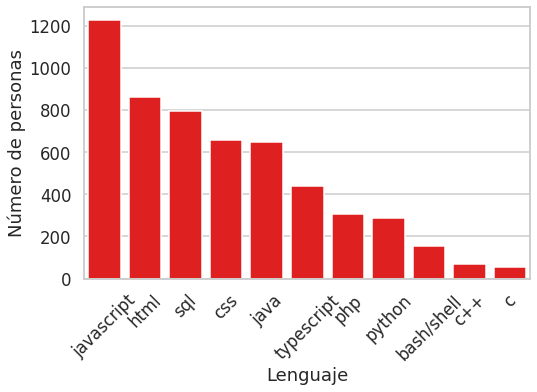

In [ ]:
# Gráfico de barra: # vs language
fig = plt.figure(figsize=(8,5))
seaborn.countplot(data=filtered_df_lang, x='programming_language', color = "red", order = filtered_df_lang['programming_language'].value_counts().index) 
plt.xticks(rotation=45)
plt.ylabel("Número de personas")
plt.xlabel("Lenguaje")
plt.ticklabel_format(style='plain', axis='y')

## Salario Vs Lenguaje de Programación

### Procesos sobre ambas variables

Agrupamos por lenguaje y estimación de la media del salario  

In [ ]:
salary_col = 'salary_monthly_BRUTO'
group_col = 'programming_language'
df_aux = filtered_df_lang[[group_col, salary_col]].groupby(group_col).median()
#df_aux = filtered_df_lang[[group_col, salary_col]].groupby(group_col).describe()

Primera visualización de los lenguajes más usados y su salario medio

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

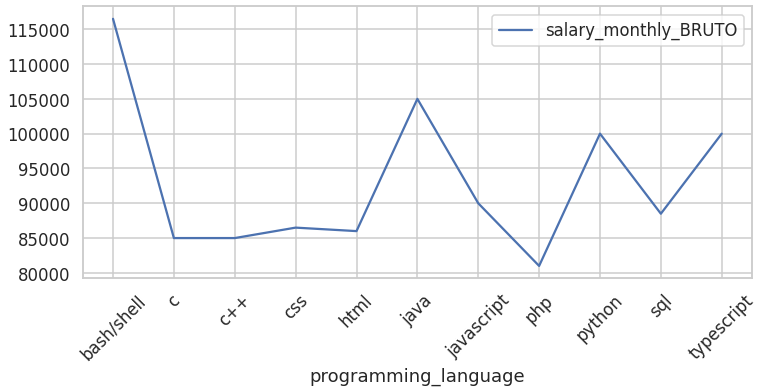

In [ ]:
fig = plt.figure(figsize=(12,5))
seaborn.lineplot(data=df_aux)
plt.xticks(rotation=45)

### Visualización de los Lenguajes de Programación mejores pagos

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

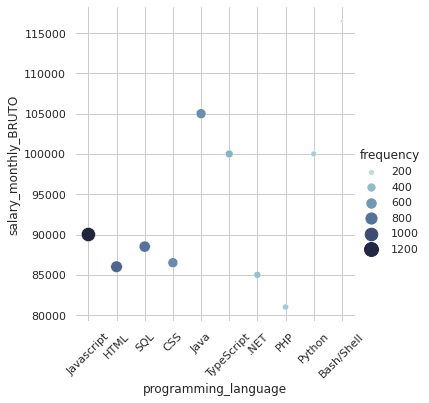

In [ ]:
Marge_df = pd.merge(language_count, df_aux, on='programming_language')
Marge_df
seaborn.set_theme(style="whitegrid")


cmap = seaborn.cubehelix_palette(rot=-.2, as_cmap=True)
g = seaborn.relplot(
    data=Marge_df,
    x="programming_language", y='salary_monthly_BRUTO',
     hue="frequency", size = "frequency",
    palette=cmap, sizes=(10, 200),
)
g.despine(left=True, bottom=True)
plt.xticks(rotation=45)

Se visualizan las frecuencias según los salarios medios para cada uno de los lenguajes mas utilizados que fueron seleccionados anteriormente. De esta forma podemos visualizar, los lenguajes de programación que representan los mejores salarios del dataset. 


## Conclusión

Pregunta:
> ¿Cuáles son los lenguajes de programación asociados a los mejores salarios?

Según nuestro análisis sobre los datos, podemos remarcar lo siguiente:

> * Entre los Lenguajes de Programación mejor pago, se encuentran aquellos que manejan "Bash/Shell" con pocas personas que lo utilizan, y sigue "Java" en segundo lugar, con un poco más de usuarios que lo manejan.
> * Entre los Lenguajes de Programación más usados, se encuentra JavaScript pero eso no quiere decir, que sea el mejor pago, ya que por encima tiene 3 lenguajes con mejor remuneración.
